* Seaborn : Matplotlib 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
    * 기본적인 시각화 기능은 Matplotlib 패키지에 의존
    * 통계 기능은 Statsmodels 패키지에 의존
* 참고
    * https://seaborn.github.io/

# 1. 스타일
Seaborn을 임포트하면 색상 들을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꾼다.  
따라서 Seaborn을 임포트 후 Matplotlib 명령을 수행해도 플롯 모양이 다르다.
* 참고
    * http://seaborn.pydata.org/tutorial/aesthetics.html
    
##### set
색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 바꾼다.
* http://seaborn.pydata.org/generated/seaborn.set.html

##### set_style
틱 스타일을 바꾼다.
* value
    * `darkgrid`, `whitegrid`, `dark`, `white`, `ticks` 스타일들
* http://seaborn.pydata.org/generated/seaborn.set_style.html
    
##### set_color_codes
기본 색상을 가리키는 문자열을 바꾼다.  
ex)  
`set_color_codes` 명령 적용 전과 이후의 `red` 문자열이 가리키는 실제 색상 코드는 다르다.
* http://seaborn.pydata.org/generated/seaborn.set_color_codes.html

In [5]:
import seaborn as sns
import matplotlib as mpl

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

# 2. 색상 팔렛트
Seaborn은 스타일 지정을 위한 색상 팔렛트(color palette)라는 것을 지원한다.
* 색상 팔렛트는 Matplotlib의 칼라맵으로 사용할 수도 있다.
* http://seaborn.pydata.org/tutorial/color_palettes.html

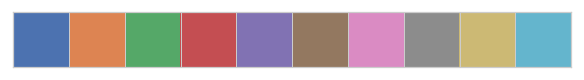

In [7]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

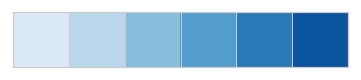

In [8]:
sns.palplot(sns.color_palette("Blues"))

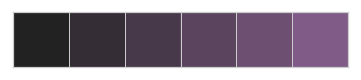

In [9]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

# 3. 1차원 분포 플롯
1차원 데이터가 실수 값이면 히스토그램 같은 실수 분포 플롯으로 나타내고, 카테고리 값이면 카운트 플롯으로 나타낸다.

In [10]:
# 사용할 샘플 데이터 로드
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

 ## 3.1. 1차원 실수 분포 플롯
 Matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능을 제공한다.
 * 1차원 실수 분포 플롯 명령으로 `rugplot`, `kdeplot`, `displot`이 있다.
 
 ##### rugplot
 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.
 * http://seaborn.pydata.org/generated/seaborn.rugplot.html

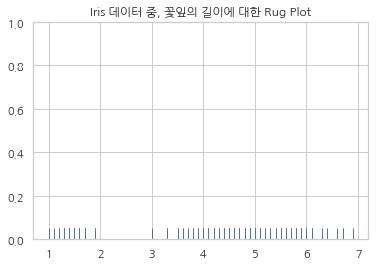

In [14]:
import matplotlib.pyplot as plt

x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot")
plt.show()

##### kdeplot
커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다.
* http://seaborn.pydata.org/generated/seaborn.kdeplot.html
* 커널 밀도 추정에 대한 내용
    * http://scikit-learn.org/stable/modules/density.html

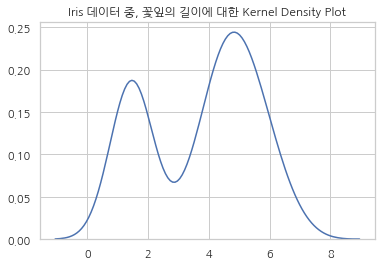

In [17]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

##### distplot
Matplotlib의 `hist`에 러그와 커널밀도 표시 기능을 함께 제공한다.
* 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 `hist` 명령보다 많이 사용된다.
* http://seaborn.pydata.org/generated/seaborn.distplot.html

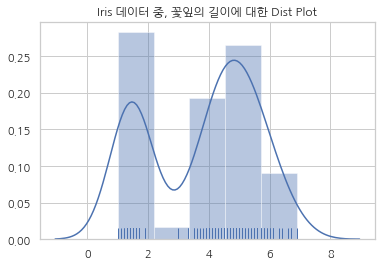

In [18]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

 ## 3.2. 카운트 플롯
 ##### countplot
 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.
 * `countplot(x="column_name", data=dataframe)`
     * `data` : 대상이 되는 데이터 프레임
         * `countplot` 명령은 데이터프레임에만 사용할 수 있다.
     * `x` : 데이터프레임의 열 이름 문자열
 * http://seaborn.pydata.org/generated/seaborn.countplot.html

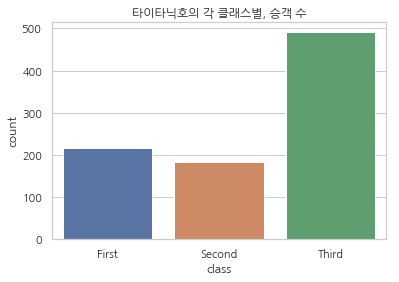

In [19]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

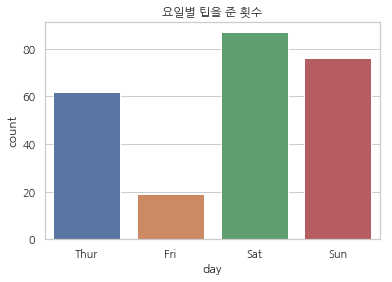

In [20]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

# 4. 다차원 데이터
 ## 4.1. 2차원 실수형 데이터
 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용하면 된다.
 
 ##### jointplot
 스캐터 플롯을 그리고, 차트의 가장자리(margin)에 각 변수의 히스토그램도 그린다.
 * http://seaborn.pydata.org/generated/seaborn.jointplot.html
 * `joinplot(x="x_name", y="y_name", data=dataframe, kind="scatter)`
     * `data` : 대상이 되는 데이터프레임
         * `joinplot` 명령도 데이터프레임에만 ㅅ용할 수 있다.
     * `x` : x변수가 될 데이터프레임의 열 이름 문자열
     * `y` : y변수가 될 데이터프레임의 열 이름 문자열
     * `kind` : 차트의 종류 지정

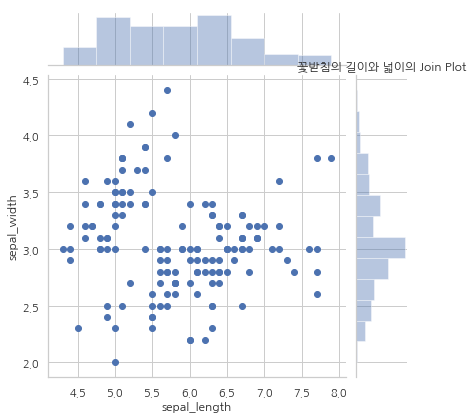

In [22]:
# 스캐터 플롯 그리기
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.title("꽃받침의 길이와 넓이의 Join Plot")
plt.show()

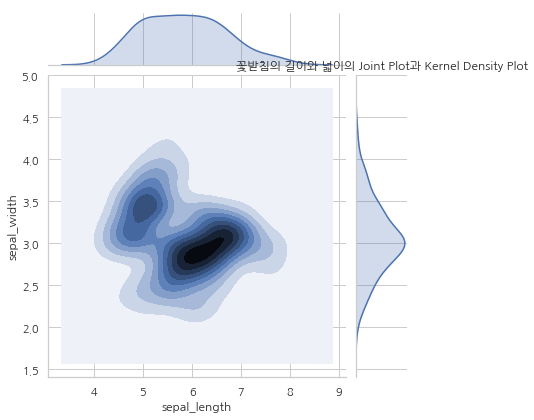

In [24]:
# 커널 밀도 히스토그램 그리기
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.title("꽃받침의 길이와 넓이의 Joint Plot과 Kernel Density Plot")
plt.show()

 ## 4.2. 다차원 실수형 데이터
 3차원 이상의 데이터라면 `pairplot` 명령을 사용한다.
 
 ##### pairplot
 데이터프레임을 인수로 받아 그리드(grid) 형태고 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다.
 * 대각선 영역에는 해당 데이터의 히스토그램을 그린다.
 * http://seaborn.pydata.org/generated/seaborn.pairplot.html

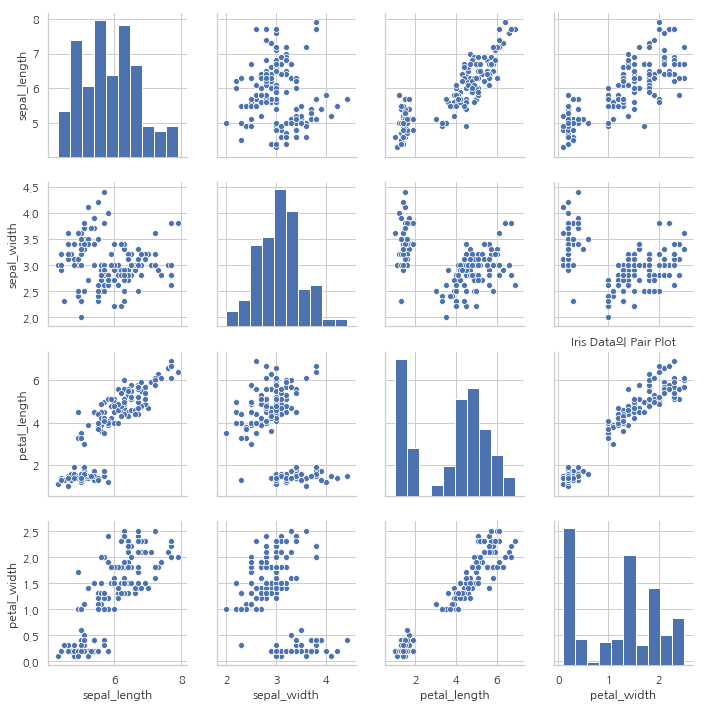

In [25]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

#### 카테고리형 데이터가 섞여 있는 경우
`hue` 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.

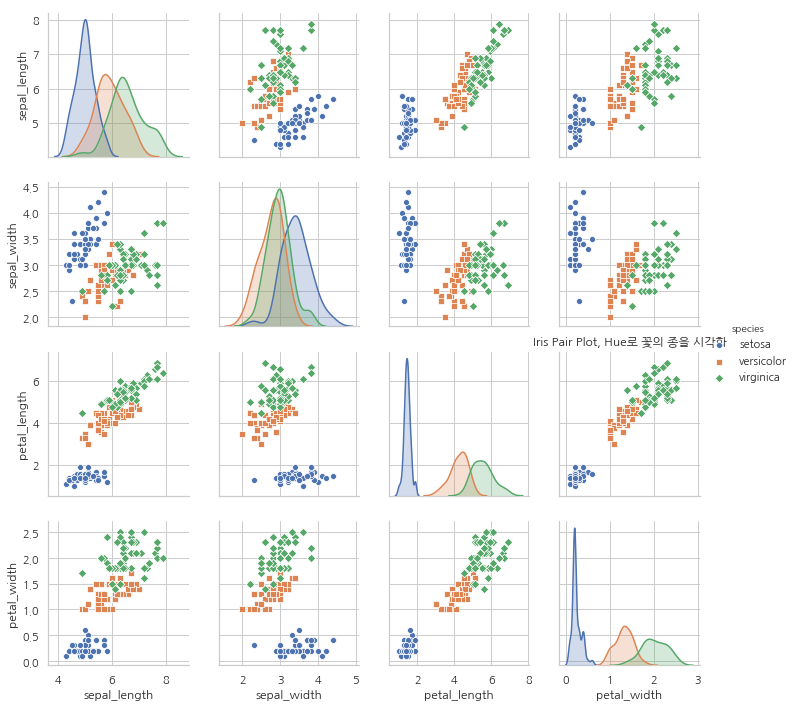

In [28]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

 ## 4.3. 2차원 카테고리 데이터
 데이터가 2차원이고 모든 값이 카테고리 값이면 `heatmap` 명령을 사용한다.
 
 ##### heatmap
 * http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [29]:
titanic_size = titanic.pivot_table(index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


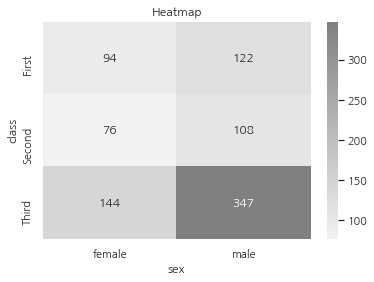

In [30]:
sns.heatmap(titanic_size, cmap=sns.light_palette("gray", as_cmap=True), annot=True,
           fmt="d")
plt.title("Heatmap")
plt.show()

 ## 4.4. 2차원 복합 데이터
 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존 플롯 외에에 아래 분포 플롯을 이용할 수 있다.
 * `barplot`
 * `boxplot`
 * `pointplot`
 * `violinplot`
 * `stripplot`
 * `swarmplot`
 
##### barplot
 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다.
 * 평균 : 막대의 높이로 표시
 * 편차 : 에러 바(error bar)로 표시
 * http://seaborn.pydata.org/generated/seaborn.barplot.html

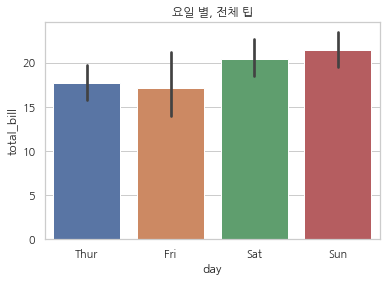

In [31]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

#### boxplot
박스-휘스커 플롯(Box-Whisker Plot) 혹은 박스 플롯이라 부르는 차트를 그려준다.  
* 박스와 박스 바깥의 선(whisker)으로 구성
* http://seaborn.pydata.org/generated/seaborn.boxplot.html
* 박스 : 1사분위수(Q1)와 3사분위수(Q3)
* IQR(interquartile range) : 3사분위수와 1사분위수의 차이(Q3 - Q1)
* 박스 내부의 가로선 : 중앙값
* 박스 외부 세로선 : 1사분위수보다 1.5 × IQR만큼 낮은 값, 3사분위수보다 1.5 × IQR만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분
* 그 바깥 점 : 아웃라이어(outlier), 일일히 점으로 표시

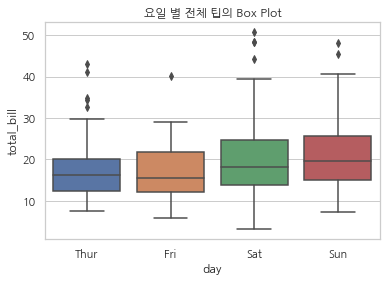

In [32]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

* `boxplot`은 중앙값, 표준 편차 등 분포의 간략한 특성을 보여준다.  
* `violinplot`, `stripplot`, `swarmplot` : 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다.

##### violinplot
세로 방향으로 커널 밀도 히스토그램을 그려준다.
* 왼쪽과 오른쪽 대칭이 되도록 하여 바이올린처럼 보인다.
* http://seaborn.pydata.org/generated/seaborn.violinplot.html

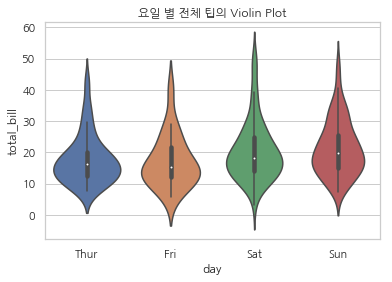

In [33]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

##### stripplot
스캐터 플롯처럼 모든 데이터를 점으로 그려준다.
* `jitter=True`를 설정하면 가로축 상의 위치를 무작위로 바꾸어서 데이터 수가 많을 경우 겹치지 않도록 한다.
* http://seaborn.pydata.org/generated/seaborn.stripplot.html

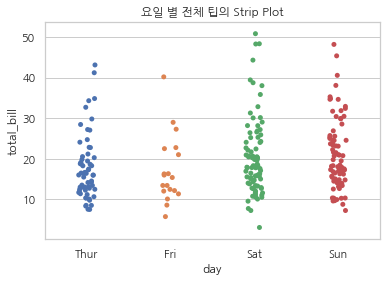

In [35]:
import numpy as np

np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

##### swarmplot
`stripplot`과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동한다.
*  http://seaborn.pydata.org/generated/seaborn.swarmplot.html

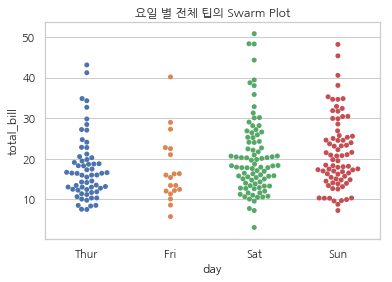

In [36]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

# 5. 다차원 복합 데이터
위의 대부분 명령어들이 2차원 이상의 고차원 데이터에 대해서도 분석할 수 있는 기능이 포함되어 있다.  
ex)  
`barplot`, `violinplot`, `boxplot` 등 : 두 가지 카테고리 값에 의한 실수값의 변화를 보기 위한 `hue`인수 제공
* `hue` 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화된다.
* `hue`값이 시각화되는 방법은 플롯의 종류에 따라 다르다.

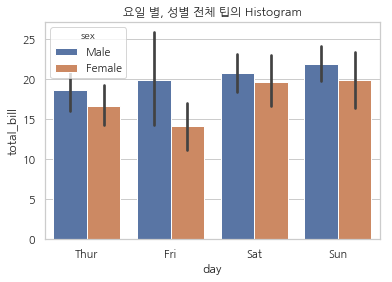

In [39]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

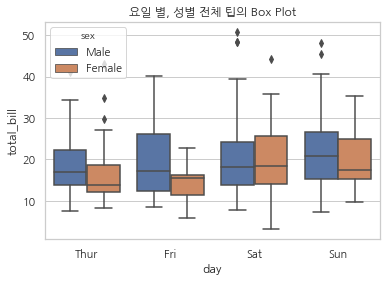

In [40]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

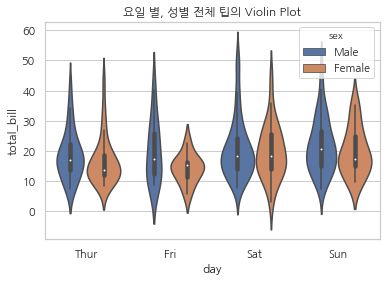

In [41]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

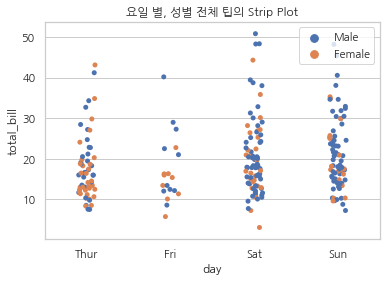

In [43]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

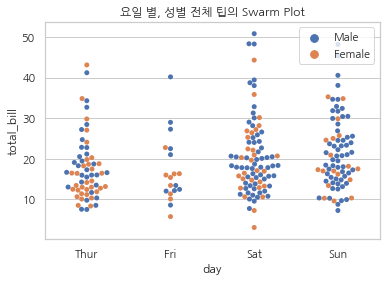

In [44]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot")
plt.legend(loc=1)
plt.show()

`stripplot`, `violinplot`, `swarmplot` 등에서는 `split` 또는 `dodge` 옵션으로 시각화 방법을 변경할 수 있다.

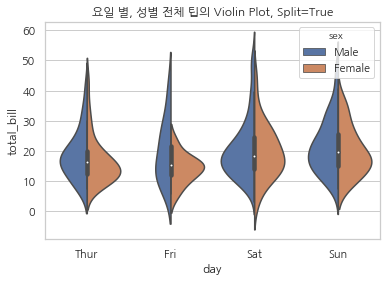

In [46]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.title("요일 별, 성별 전체 팁의 Violin Plot, Split=True")
plt.show()

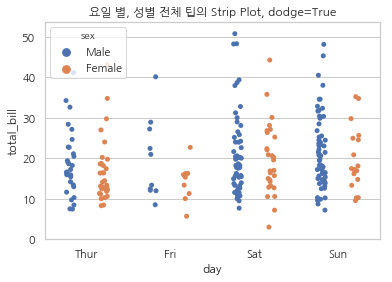

In [47]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot, dodge=True")
plt.show()

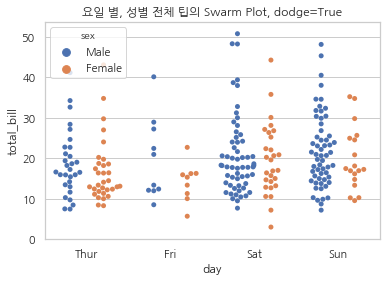

In [48]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot, dodge=True")
plt.show()

`heatmap`을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.
* http://seaborn.pydata.org/generated/seaborn.heatmap.html

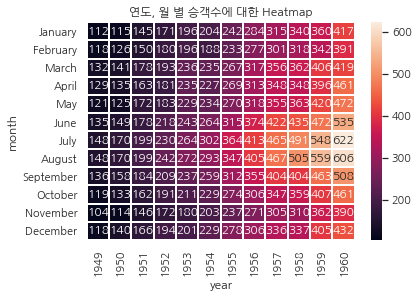

In [51]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidth=1)
plt.show()

# 6. catplot
색상(hue), 행(row) 등을 동시에 사용하여 3개 이상의 카테고리 값에 의한 분포 변화를 보여준다.
* http://seaborn.pydata.org/generated/seaborn.factorplot.html

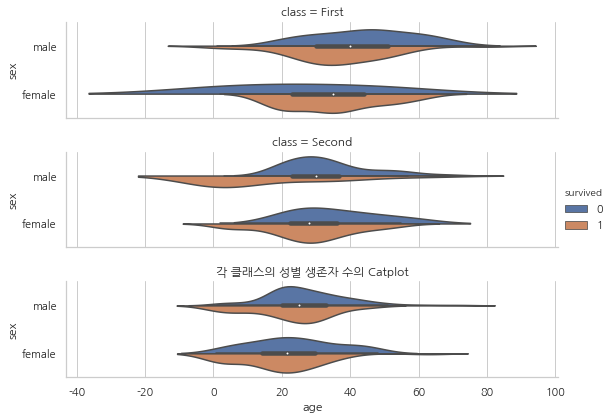

In [52]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data, kind="violin",
           split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

# 7. 기타
시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수 있다.

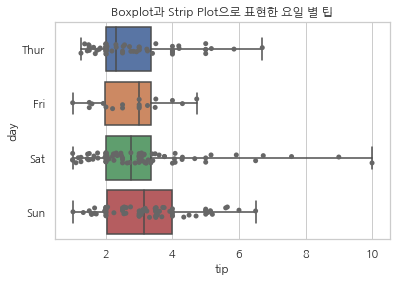

In [54]:
plt.title("Boxplot과 Strip Plot으로 표현한 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip",y="day", data=tips, jitter=True, color="0.4")
plt.show()

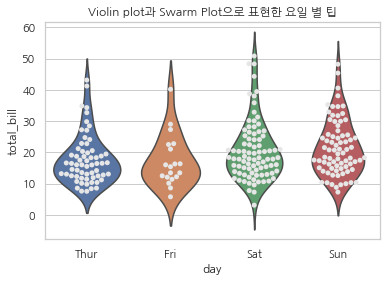

In [58]:
plt.title("Violin plot과 Swarm Plot으로 표현한 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()